#Unziping git

In [ ]:
!unzip /content/multivariate-weather-data-clustering-main.zip

#Daily dataset Pull

In [2]:
from google.colab import drive
import pandas as pd
import numpy as np
import xarray as xr
import netCDF4 as nc
import sys
drive.mount('/content/drive')
path7 = ('/content/drive/MyDrive/Multivariate Data Independent Study/New_ERA5_meteo_sfc_2021_daily.nc') # location of dataset
data = xr.open_dataset(path7)

Mounted at /content/drive


In [6]:
path_to_module = '/content/multivariate-weather-data-clustering-main/MWDC'
sys.path.append(path_to_module)
from preprocessing import  null_fill
null_fill(input)

AttributeError: ignored

#Data Pre-processing 

In [3]:
#Calling Functions from extracted zip (might not be needed when installed as package)
path_to_module = '/content/multivariate-weather-data-clustering-main/MWDC'
sys.path.append(path_to_module)
from preprocessing import  transformddaily

In [ ]:
data1=transformddaily(data)

In [5]:
#Pulling Preprocessed data
path5 = ('/content/drive/MyDrive/Multivariate Data Independent Study/New_ERA5_meteo_sfc_2021_daily.csv')
data1 = pd.read_csv(path5)
data1=data1.drop(columns=['Unnamed: 0'])

#DBscan

In [6]:
#Calling Functions from extracted zip (might not be needed when installed as package)
path_to_module = '/content/multivariate-weather-data-clustering-main/MWDC/clustering'
sys.path.append(path_to_module)
from dbscan import dbscanreal #importing function

In [18]:
#dbscanreal(x, eps1=0.5, min=5)	
#eps1 for epsilon , 
#min for minimum samples, 
#x is for data input (the input data should be fully transformed and normalized)
frame1,label1=dbscanreal(data1,0.19,8)

Estimated number of clusters: 2
 0    147
 1    121
-1     97
Name: Cluster, dtype: int64
Estimated number of noise points: 97


Removing noise (this can be later made a function also)

In [9]:
frame1.drop(frame1.index[(frame1["Cluster"] == -1)],axis=0,inplace=True)
len(frame1[frame1['Cluster']==-1])
label1 = label1[label1 != -1]

#RMSE

In [10]:
from evaluation import RMSE
RMSE(data1,label1,frame1,True)

,0,1
0,111.52,115.9
1,115.9,66.46


#Visualization

In [20]:
#Calling Functions from extracted zip (might not be needed when installed as package)
path_to_module = '/content/multivariate-weather-data-clustering-main/MWDC/Visualization'
sys.path.append(path_to_module)
from make_Csv_cluster import make_Csv_cluster

In [21]:
#Making a csv file 
make_Csv_cluster(label1,'Dbscan_all_variables.csv')
#label1 contains cluster ids
#2nd hyperparameter contains name of the file generated.

In [23]:
from Visualization import visualization

In [24]:
#ncpath is the source of nc file 
ncpath='/content/drive/MyDrive/Multivariate Data Independent Study/New_ERA5_meteo_sfc_2021_daily.nc'
#cluster_file is location the file which is generated by make_Csv_cluster()
cluster_file='Dbscan_all_variables.csv'
#coast_file is location of coast.txt which represent how a coastal region should look
coast_file='/content/multivariate-weather-data-clustering-main/MWDC/Visualization/coast.txt'

total clusters:  3
varid: sst
var_range: [286.9919318332959, 299.0668423730597]
varid: t2m
var_range: [-0.08280723076385484, -0.07839707801928061]
varid: u10
var_range: [-15.129702662479593, 16.82725476413482]
varid: v10
var_range: [-14.294945017569995, 14.039669939743764]
varid: sshf
var_range: [-43.41541985801895, 175.22246693947238]
varid: sp
var_range: [988.4012627283996, 1035.2741383402094]


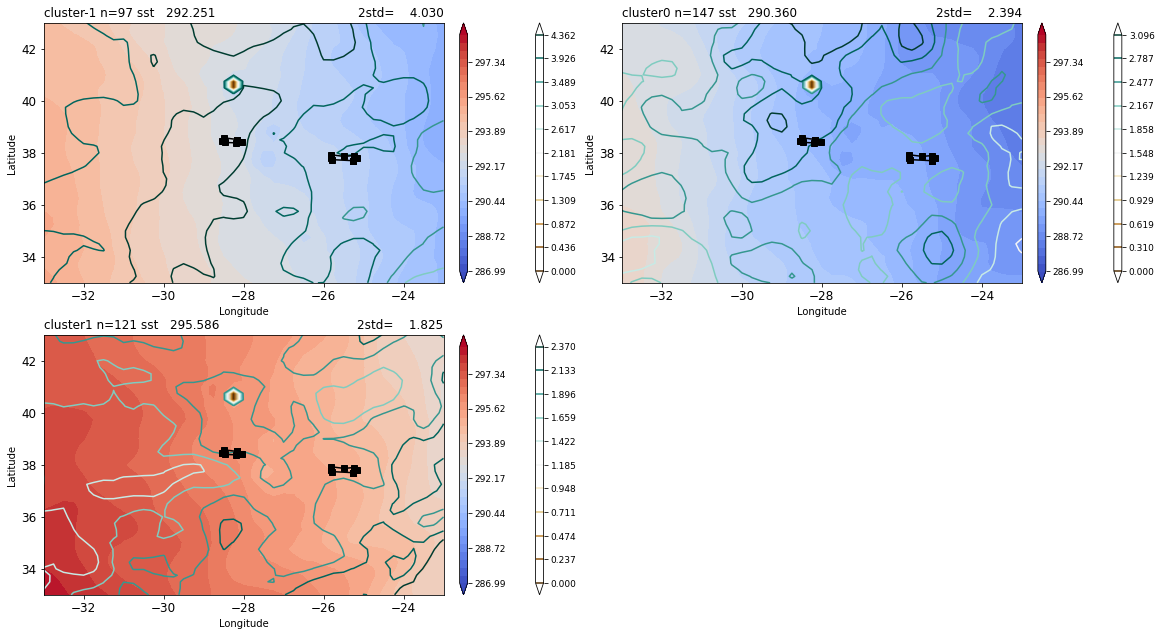

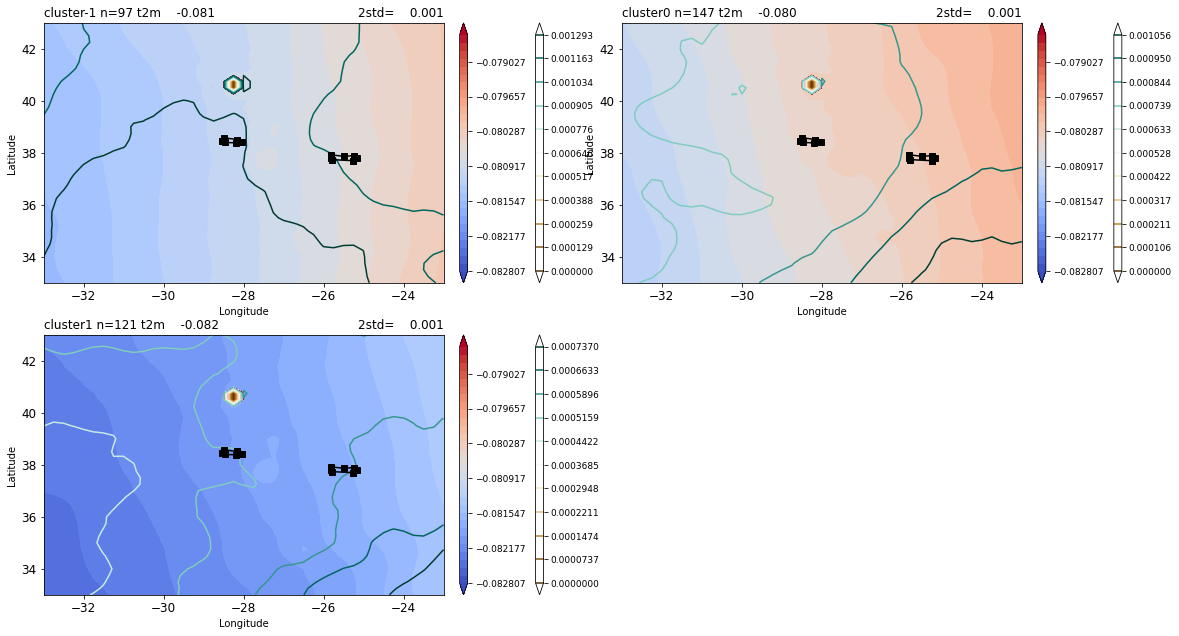

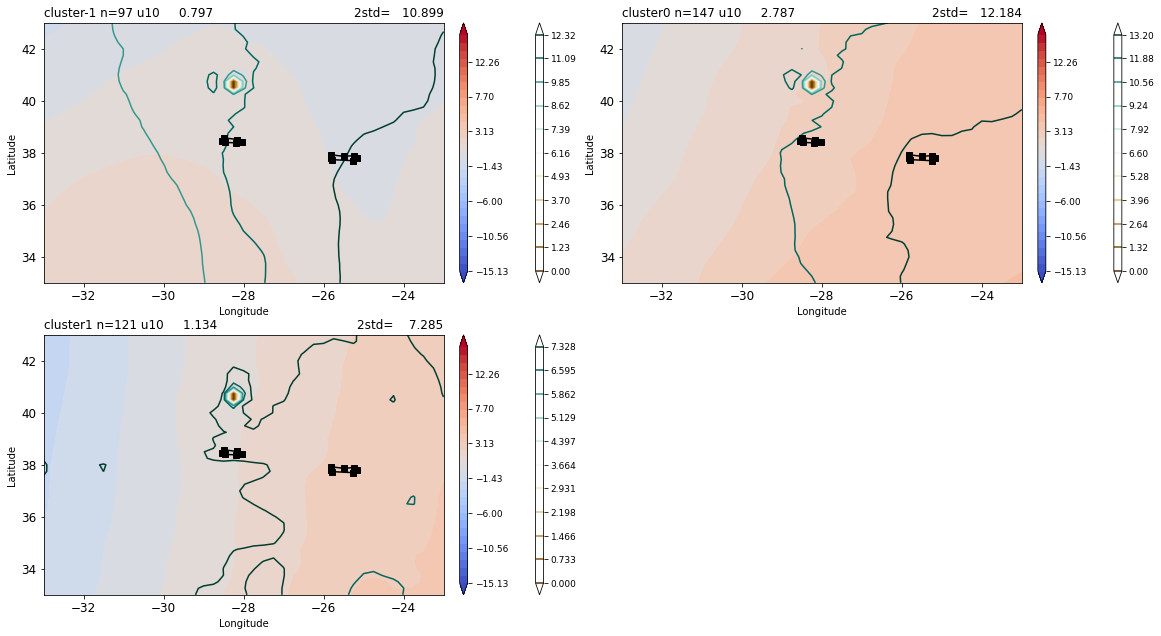

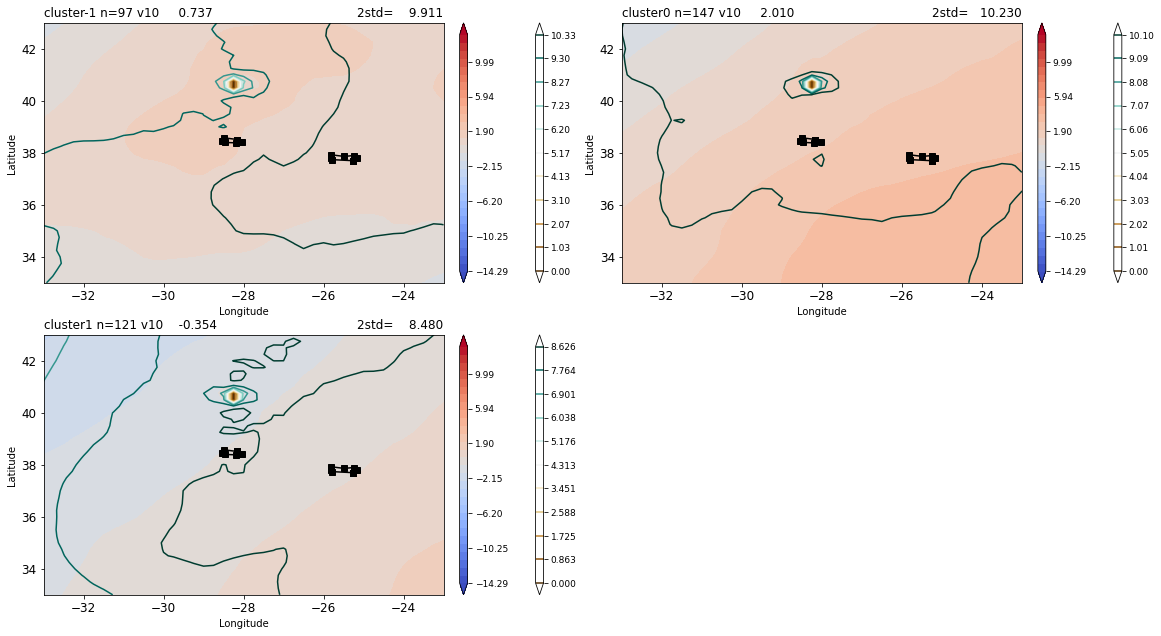

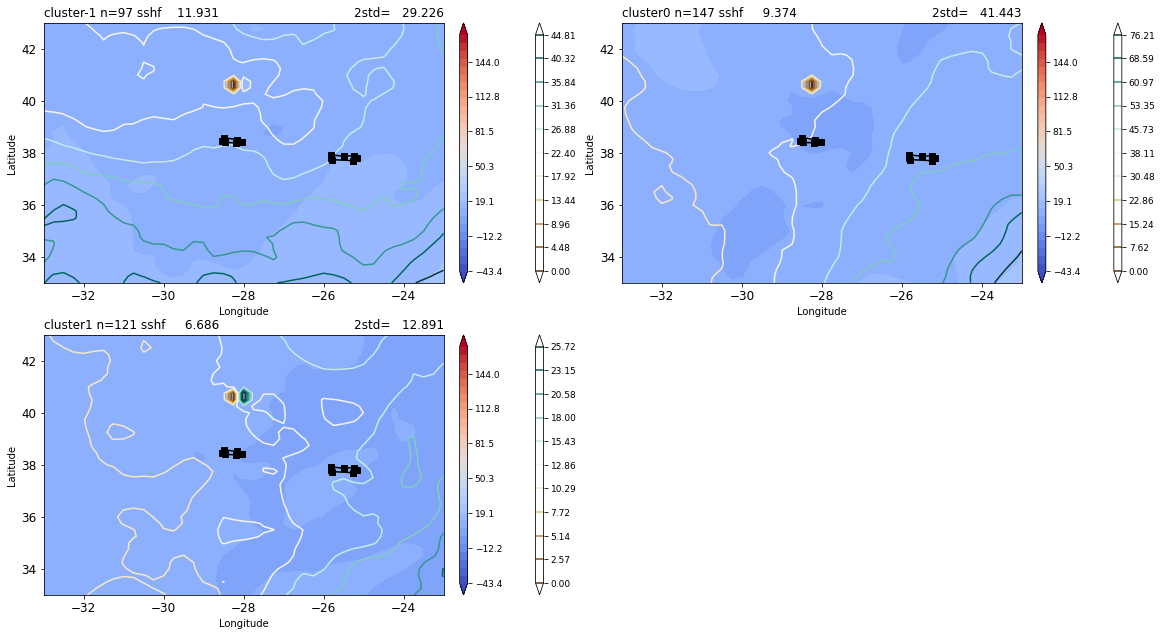

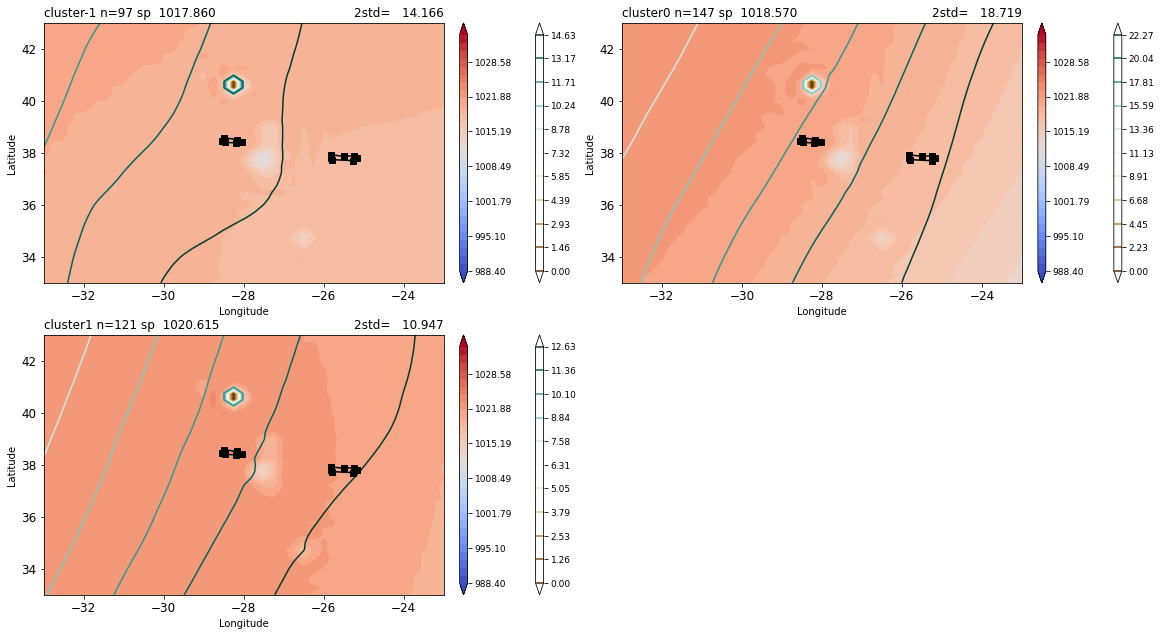

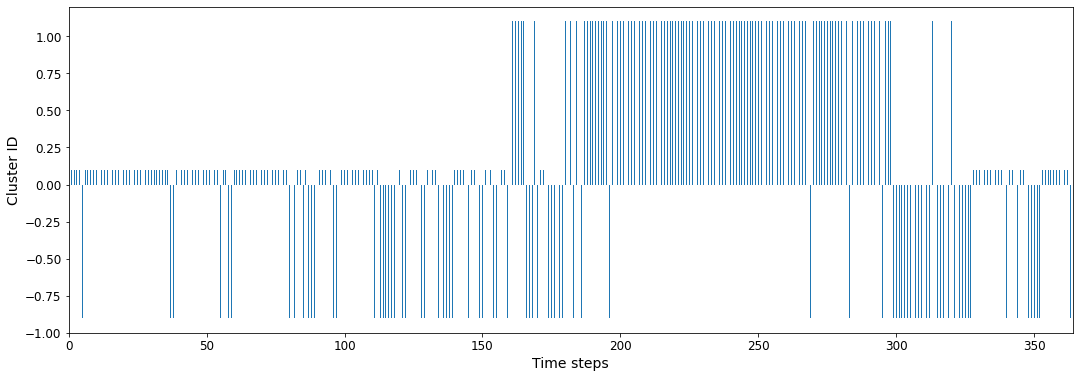

In [25]:
#* visualization()   
#1. data_file is the .nc file.   
#Example data_file = 'path/data.nc'  It is the raw unprocessed data.   

#2. cluster_filename is the csv file which contains clusterid and time_step.    
#Example cluster_filename = 'path/clusters.csv'  # This file contains what cluster belongs to what date.    

#3. coast_file =  This file contains the data of how a coastline should look like in the result.     
#Example 'path/coast.txt'. 

#* make_Csv_cluster().   
#1.# label contains the clusterids.   
#2. # name is the file name that will generated eg:('test.csv').   
visualization(ncpath,cluster_file,coast_file)

#DBscan with PCA

PCA compenent testing

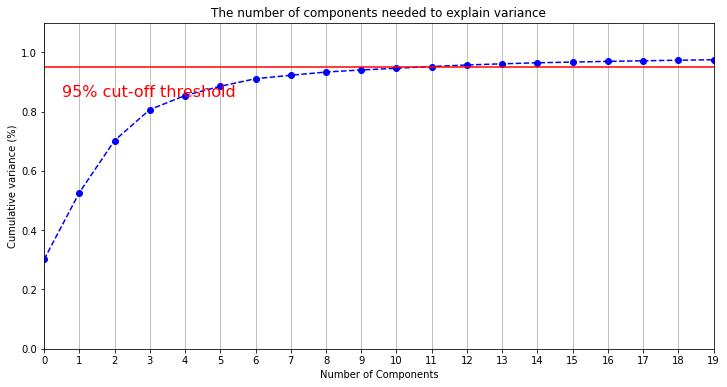

In [26]:
from preprocessing import pcacomponents
pcacomponents(data1)

From the results we understand that 11 would be the most appropriate components.

#Performing DBscan PCA

In [27]:
#Calling Functions from extracted zip (might not be needed when installed as package)
path_to_module = '/content/multivariate-weather-data-clustering-main/MWDC/'
sys.path.append(path_to_module)
from preprocessing import pca1

In [40]:
#pca can be applied by pca1(data,n): # data is data to be input , n is the number of components 
frame5,label5= dbscanreal(pca1(data1,11),0.14,6)

Estimated number of clusters: 2
 0    153
 1    124
-1     88
Name: Cluster, dtype: int64
Estimated number of noise points: 88


Removing noise

In [34]:
frame5.drop(frame5.index[(frame5["Cluster"] == -1)],axis=0,inplace=True)
len(frame5[frame5['Cluster']==-1])
label5 = label5[label5 != -1]

In [35]:
RMSE(data1,label5,frame5,True)

,0,1
0,106.35,116.76
1,116.76,62.23


In [41]:
make_Csv_cluster(label5,'Dbscan_all_variables_PCA.csv')

In [42]:
ncpath='/content/drive/MyDrive/Multivariate Data Independent Study/New_ERA5_meteo_sfc_2021_daily.nc'
cluster_file='Dbscan_all_variables_PCA.csv'
coast_file='/content/multivariate-weather-data-clustering-main/MWDC/Visualization/coast.txt'

total clusters:  3
varid: sst
var_range: [286.9919318332959, 299.0668423730597]


/content/multivariate-weather-data-clustering-main/MWDC/Visualization/Visualization.py:54: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot(panel)
/content/multivariate-weather-data-clustering-main/MWDC/Visualization/Visualization.py:71: UserWarning: The following kwargs were not used by contour: 'linewidth'
  p1=ax.contour(lon0,lat0,var,cmap=cmap0,levels=np.arange(var_range[0],var_range[1],(var_range[1]-var_range[0])/11),extend = 'both',linewidth=0.6)


varid: t2m
var_range: [-0.08280723076385484, -0.07839707801928061]
varid: u10
var_range: [-15.129702662479593, 16.82725476413482]
varid: v10
var_range: [-14.294945017569995, 14.039669939743764]
varid: sshf
var_range: [-43.41541985801895, 175.22246693947238]
varid: sp
var_range: [988.4012627283996, 1035.2741383402094]


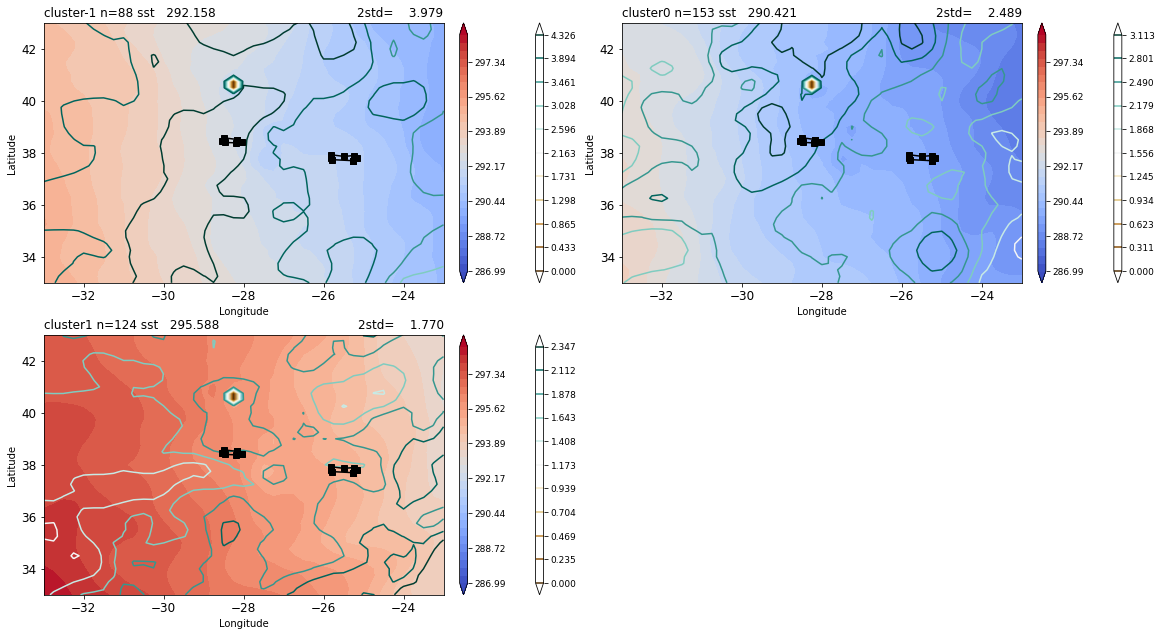

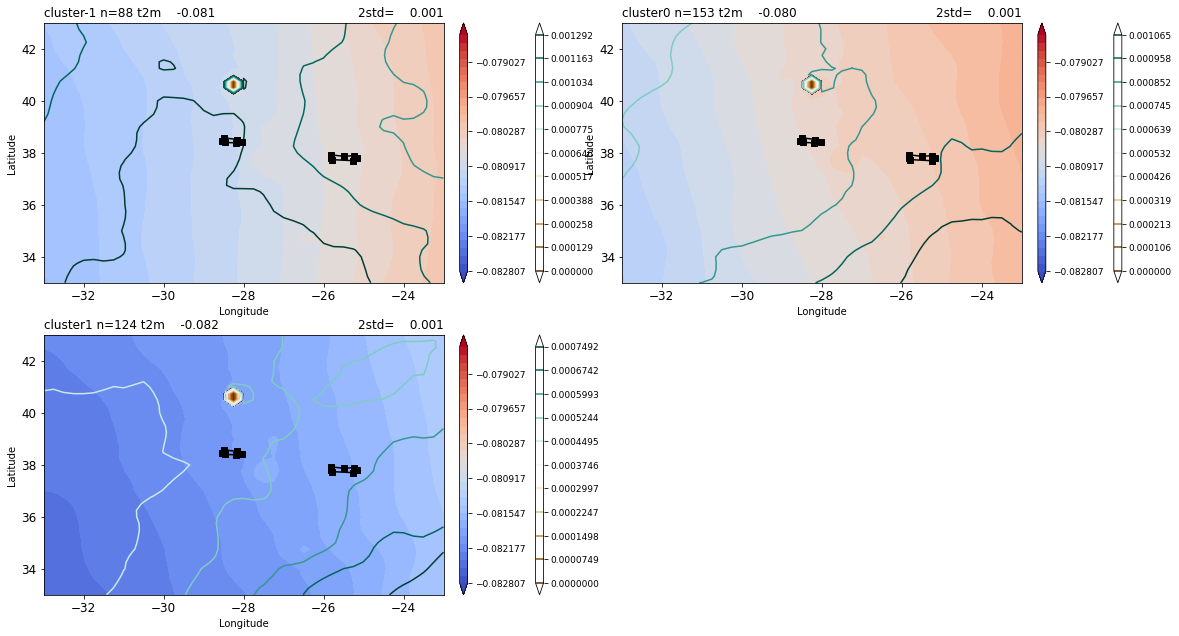

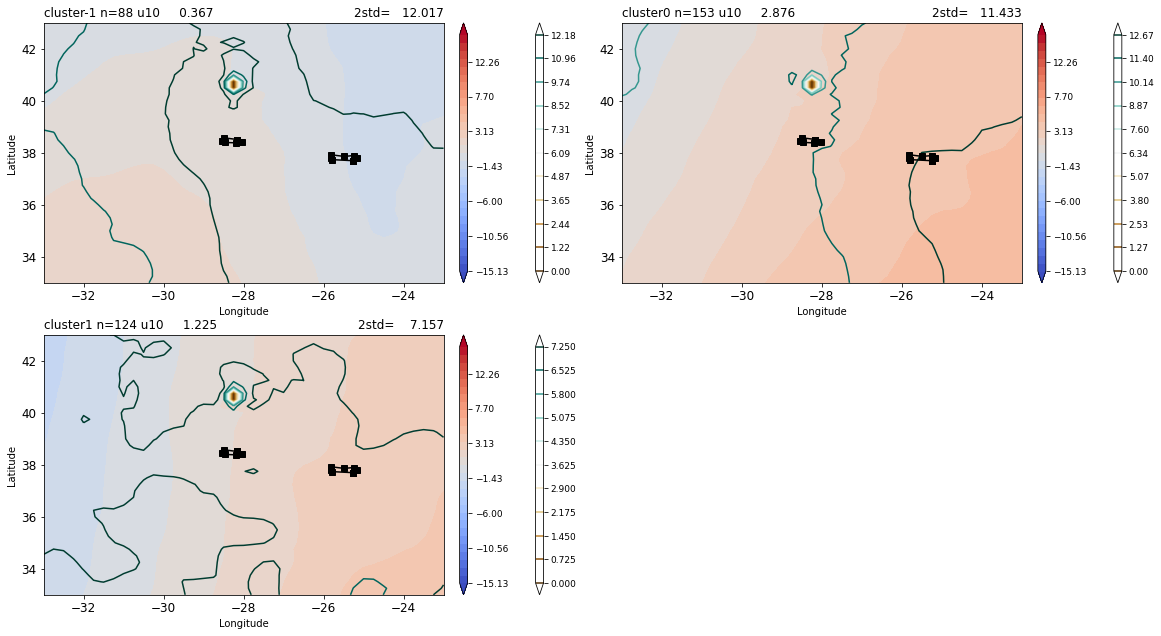

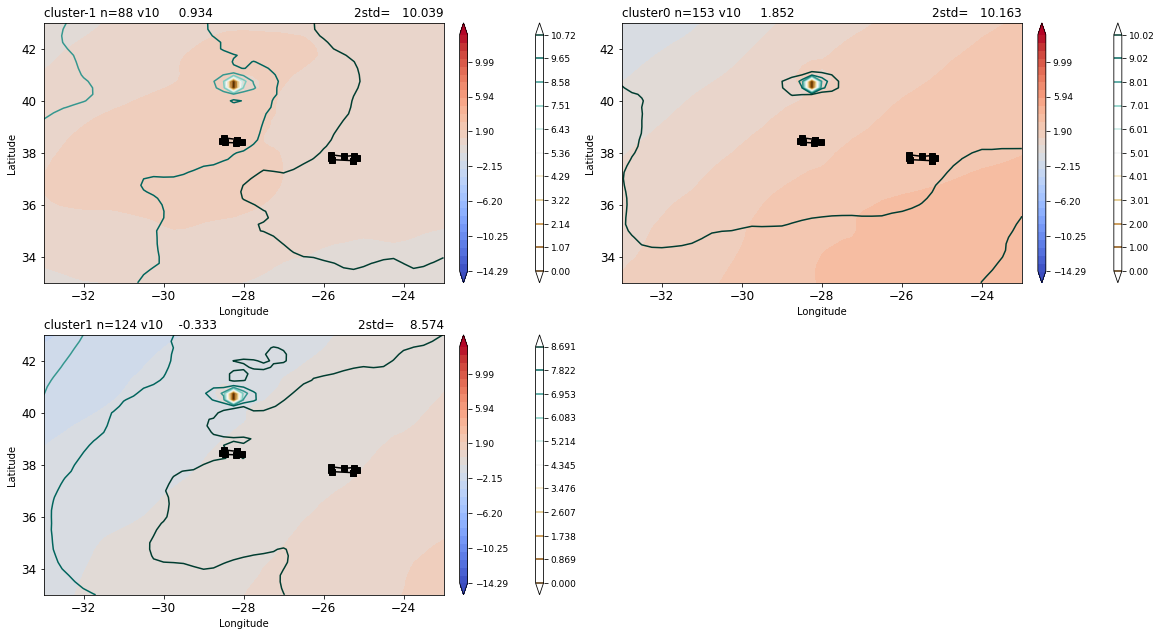

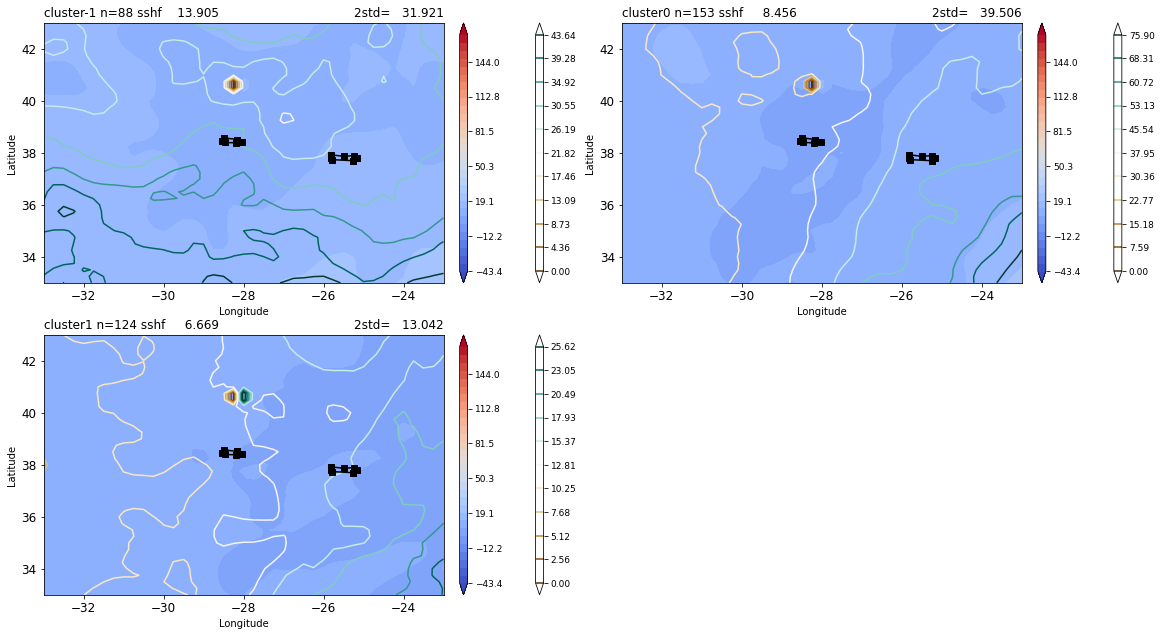

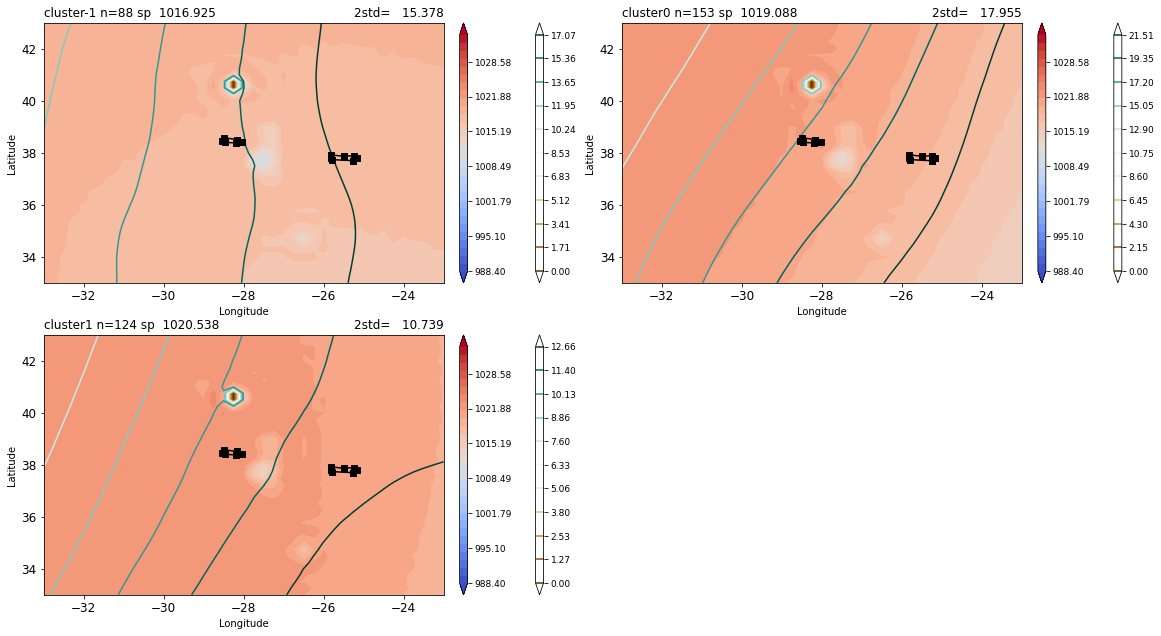

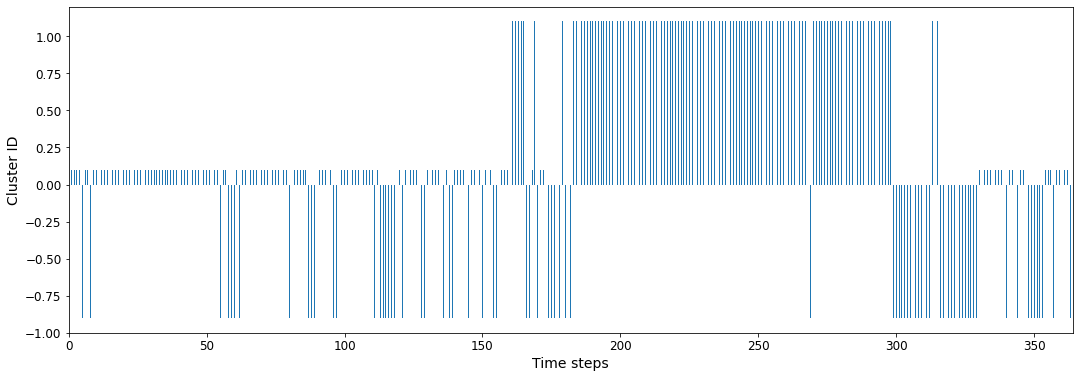

In [43]:
visualization(ncpath,cluster_file,coast_file)